In [3]:
import json
from tqdm import *
import re
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.image as mpimg
from collections import Counter
import numpy as np

from utils import *

In [4]:
train_questions = json.load(open(dataroot + "questions1.2/train_balanced_questions.json"))
train_questions.update(json.load(open(dataroot + "questions1.2/val_balanced_questions.json")))
# train_questions = {}
# for i in trange(10):
#     tmp = json.load(open(dataroot + "questions1.2/train_all_questions/train_all_questions_%d.json"%i))
#     for qid, qv in tmp.items():
#         tmp[qid] = {k:qv[k] for k in ['answer', 'fullAnswer', 'imageId', 'question', 'semantic'] }
#     train_questions.update(tmp)

train_sceneGraphs = json.load(open(dataroot + "sceneGraphs/train_sceneGraphs.json"))

qids = sorted(train_questions.keys())

In [5]:
print("number of images: ", len(train_sceneGraphs))
print("number of questions: ", len(train_questions))

number of images:  74942
number of questions:  1075062


Question id:  00107862


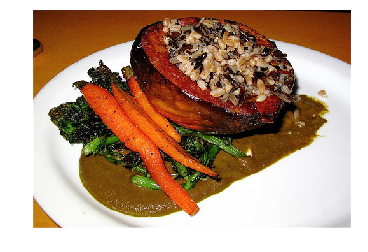

'Which material is the plate made of, porcelain or metal?'
'porcelain, The plate is made of porcelain.'
[{'argument': 'plate (2594407)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|metal',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  00171266


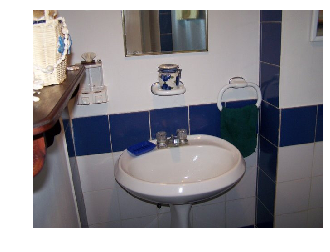

'Which material was used to make the white sink, porcelain or metal?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (1070943)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'white', 'dependencies': [0], 'operation': 'filter color'},
 {'argument': 'porcelain|metal',
  'dependencies': [1],
  'operation': 'choose material'}]

Question id:  02153880


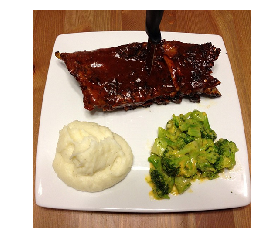

'Is the plate made of metal or porcelain?'
'porcelain, The plate is made of porcelain.'
[{'argument': 'plate (291716)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|metal',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  02971088


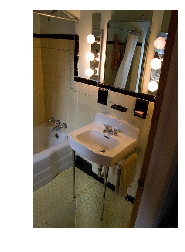

'Is the sink made of glass or porcelain?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (378582)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|glass',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  03376187


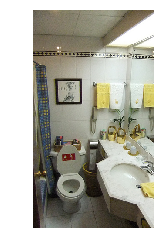

'Is the sink made of porcelain or glass?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (768608)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|glass',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  04282108


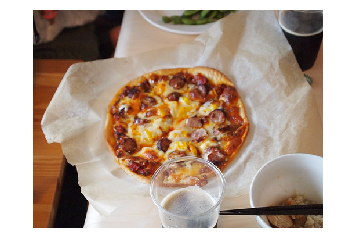

'Is the dish made of porcelain or metal?'
'porcelain, The dish is made of porcelain.'
[{'argument': 'dish (4458033)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|metal',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  05509785


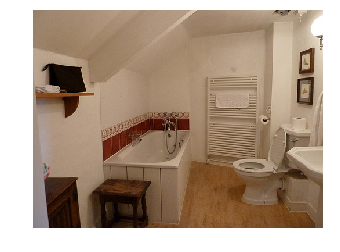

'Which material is used to make the white bowl, porcelain or wood?'
'porcelain, The bowl is made of porcelain.'
[{'argument': 'bowl (631240)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'white', 'dependencies': [0], 'operation': 'filter color'},
 {'argument': 'porcelain|wood',
  'dependencies': [1],
  'operation': 'choose material'}]

Question id:  06852922


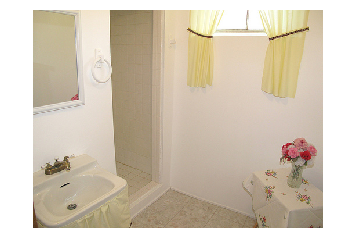

'Is the sink made of metal or porcelain?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (1345665)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|metal',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  06866306


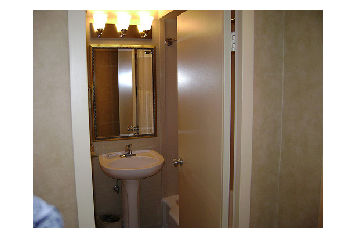

'Which material makes up the white sink, porcelain or chrome?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (1344354)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'white', 'dependencies': [0], 'operation': 'filter color'},
 {'argument': 'porcelain|chrome',
  'dependencies': [1],
  'operation': 'choose material'}]

Question id:  06963712


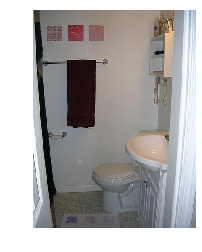

'What material is the sink, porcelain or steel?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (3360511)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|steel',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  07662702


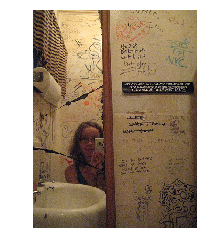

'Is the white sink made of porcelain or metal?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (2690743)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'white', 'dependencies': [0], 'operation': 'filter color'},
 {'argument': 'porcelain|metal',
  'dependencies': [1],
  'operation': 'choose material'}]

Question id:  07866546


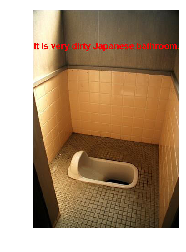

('Which material was used to make the white toilet, porcelain or stainless '
 'steel?')
'porcelain, The toilet is made of porcelain.'
[{'argument': 'toilet (677262)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'white', 'dependencies': [0], 'operation': 'filter color'},
 {'argument': 'porcelain|stainless steel',
  'dependencies': [1],
  'operation': 'choose material'}]

Question id:  11345387


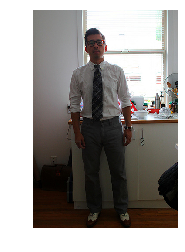

'Is the bowl made of wood or porcelain?'
'porcelain, The bowl is made of porcelain.'
[{'argument': 'bowl (2590642)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|wood',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  11714142


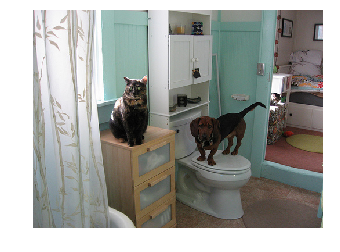

'Is the toilet to the left of the rug made of porcelain or wood?'
'porcelain, The toilet is made of porcelain.'
[{'argument': 'rug (464833)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'toilet,to the left of,s (464808)',
  'dependencies': [0],
  'operation': 'relate'},
 {'argument': 'porcelain|wood',
  'dependencies': [1],
  'operation': 'choose material'}]

Question id:  121045617


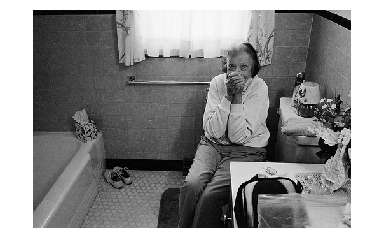

'Is that bathtub made of plastic or porcelain?'
'porcelain, The bathtub is made of porcelain.'
[{'argument': 'bathtub (1229092)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|plastic',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  12307328


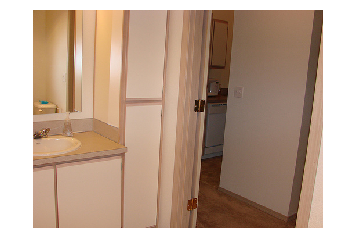

'Which material is the sink above the cabinets made of, porcelain or metal?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'cabinets (422986)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'sink,above,s (422978)',
  'dependencies': [0],
  'operation': 'relate'},
 {'argument': 'porcelain|metal',
  'dependencies': [1],
  'operation': 'choose material'}]

Question id:  12620791


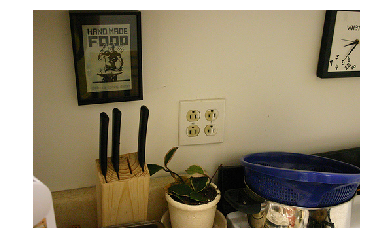

'Is the sink made of porcelain or chrome?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (1316795)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|chrome',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  1359030


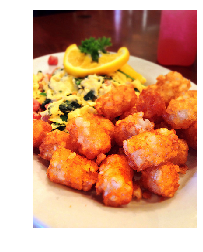

'Which material is the plate made of, porcelain or wood?'
'porcelain, The plate is made of porcelain.'
[{'argument': 'plate (1344758)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|wood',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  15385064


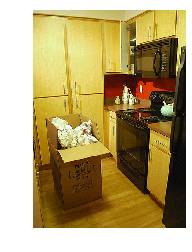

'What makes up the tea kettle, porcelain or metal?'
'porcelain, The tea kettle is made of porcelain.'
[{'argument': 'tea kettle (990387)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|metal',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  15870963


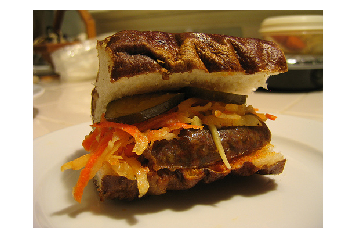

'Is the plate made of porcelain or plastic?'
'porcelain, The plate is made of porcelain.'
[{'argument': 'plate (540512)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|plastic',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  16786825


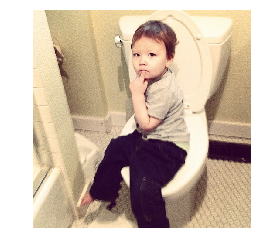

'What is that toilet made of, porcelain or metal?'
'porcelain, The toilet is made of porcelain.'
[{'argument': 'toilet (384282)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|metal',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  17581684


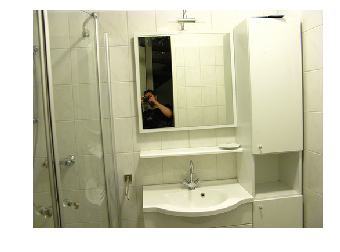

'What material is the sink, porcelain or steel?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (1194195)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|steel',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  18466147


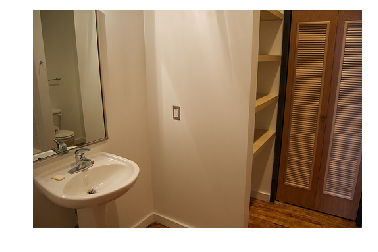

('Which material is used to make the sink below the mirror, porcelain or maybe '
 'metal?')
'porcelain, The sink is made of porcelain.'
[{'argument': 'mirror (537745)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'sink,below,s (537746)',
  'dependencies': [0],
  'operation': 'relate'},
 {'argument': 'porcelain|metal',
  'dependencies': [1],
  'operation': 'choose material'}]

Question id:  18485039


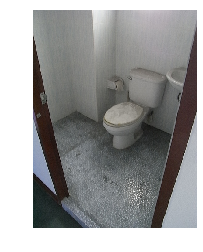

'Is the sink made of wood or porcelain?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (1117529)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'porcelain|wood',
  'dependencies': [0],
  'operation': 'choose material'}]

Question id:  19294118


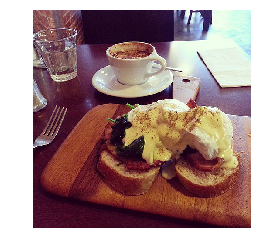

'What is used to make the white plate, Styrofoam or porcelain?'
'porcelain, The plate is made of porcelain.'
[{'argument': 'plate (3684243)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'white', 'dependencies': [0], 'operation': 'filter color'},
 {'argument': 'porcelain|styrofoam',
  'dependencies': [1],
  'operation': 'choose material'}]

Question id:  19340630


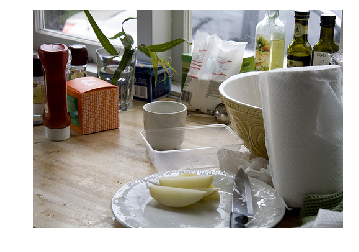

'Is the white plate made of porcelain or paper?'
'porcelain, The plate is made of porcelain.'
[{'argument': 'plate (546853)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'white', 'dependencies': [0], 'operation': 'filter color'},
 {'argument': 'porcelain|paper',
  'dependencies': [1],
  'operation': 'choose material'}]

Question id:  19417933


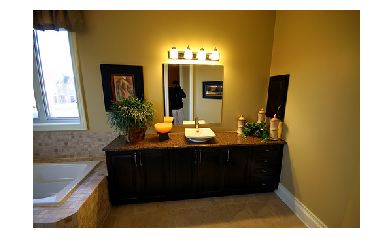

'Which material makes up the sink that is not large, porcelain or wood?'
'porcelain, The sink is made of porcelain.'
[{'argument': 'sink (1252800)', 'dependencies': [], 'operation': 'select'},
 {'argument': 'not(large)', 'dependencies': [0], 'operation': 'filter size'},
 {'argument': 'porcelain|wood',
  'dependencies': [1],
  'operation': 'choose material'}]



In [6]:
for idx in range(len(qids)):
    #idx = np.random.randint(len(qids))
    qid = qids[idx]
    #qid = '11497791'
    
    q = train_questions[qid]
    
    if 'choose' not in ' '.join([x['operation'] for x in q['semantic']]):
        continue
    
    #if 'standing in front of' not in ' '.join(
    #    [x['argument'] for x in q['semantic'] if 'choose' in x['operation']]):
    #    continue
        
    if q['answer'] != 'porcelain':
        continue
    
    
    print("Question id: ", qid)
    imageid = q['imageId']
    

    image_path = dataroot + 'allImages/images/' + str(imageid) + '.jpg'
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    
    pprint(q['question'])
    pprint(q['answer'] + ', ' + q['fullAnswer'])
    pprint(q['semantic'])
    #pprint(train_sceneGraphs[imageid])
    
    print()


In [7]:
semantic_list = []
for q in train_questions.values():
    semantic = q['semantic']
    for op in semantic:
        semantic_list.append(op)

#semantic_list = [(op['operation'], re.sub("[(]|[0-9]|[-]|[)]", "",op['argument'])) for op in semantic_list]
#semantic_list = [op['operation'] for op in semantic_list]
#semantic_list = Counter(semantic_list)

tmp = {}
for op in semantic_list:
    operation = op['operation']
    argument = re.sub("\((([0-9]+(,[0-9]+)*)|[-])\)", "",op['argument'])
    argument = argument.strip()
    if operation not in tmp:
        tmp[operation] = {}
    if argument not in tmp[operation]:
        tmp[operation][argument] = 0
    tmp[operation][argument] += 1
    
semantic_list = tmp
#json.dump(semantic_list, open('data/semantic_list.json', 'w'), indent=2)
print(len(semantic_list))

136


In [8]:
pprint(semantic_list)

{'and': {'': 53005},
 'choose': {'adult|baby': 26,
            'antique|modern': 19,
            'baby|adult': 17,
            'baked|raw': 9,
            'baked|uncooked': 3,
            'bare|bushy': 15,
            'bare|covered': 7,
            'bare|grassy': 11,
            'bare|leafy': 25,
            'bare|lush': 12,
            'bare|sandy': 23,
            'bare|snowy': 12,
            'baseball|soccer': 61,
            'baseball|tennis': 59,
            'beautiful|ugly': 32,
            'black and white|colorful': 61,
            'black and white|rainbow colored': 1,
            'bushy|bare': 13,
            'bushy|leafless': 4,
            'clear|murky': 16,
            'closed|open': 599,
            'colorful|black and white': 68,
            'cooked|raw': 12,
            'cooked|uncooked': 4,
            'covered|bare': 31,
            'covered|leafless': 7,
            'curled|straight': 10,
            'curly|straight': 53,
            'curved|straight': 8,
           

                  'silver|yellow': 41,
                  'tan|black': 118,
                  'tan|blond': 4,
                  'tan|blue': 66,
                  'tan|dark blue': 1,
                  'tan|dark brown': 5,
                  'tan|green': 47,
                  'tan|khaki': 6,
                  'tan|purple': 16,
                  'tan|red': 66,
                  'tan|silver': 11,
                  'teal|black': 2,
                  'teal|brown': 3,
                  'teal|gray': 1,
                  'teal|purple': 3,
                  'teal|red': 1,
                  'teal|white': 4,
                  'teal|yellow': 2,
                  'white|black': 849,
                  'white|blond': 12,
                  'white|blue': 560,
                  'white|brown': 436,
                  'white|brunette': 3,
                  'white|dark blue': 13,
                  'white|dark brown': 16,
                  'white|gold': 45,
                  'white|green': 336,
                

                 'dog|cats': 12,
                 'dog|cow': 5,
                 'dog|duck': 1,
                 'dog|elephant': 2,
                 'dog|goat': 1,
                 'dog|horse': 6,
                 'dog|kitten': 30,
                 'dog|kittens': 17,
                 'dog|panda': 1,
                 'dog|pigeon': 1,
                 'dog|sheep': 2,
                 'dog|squirrel': 31,
                 'dog|squirrels': 25,
                 'dog|tiger': 1,
                 'dog|zebra': 1,
                 'doll|stuffed bear': 4,
                 'doll|stuffed bears': 3,
                 'doll|teddy bear': 8,
                 'doll|toy car': 1,
                 'dolphin|shark': 1,
                 'dolphin|sharks': 1,
                 'donkeys|goats': 1,
                 'donkeys|lambs': 1,
                 'donkeys|zebra': 2,
                 'donkey|cow': 1,
                 'donkey|dog': 1,
                 'donkey|goat': 2,
                 'donkey|goats': 1,
        

                 'ottoman|shelf': 1,
                 'ottoman|table': 1,
                 'outfits|shorts': 1,
                 'outfit|blazer': 1,
                 'outfit|dress': 1,
                 'outfit|glove': 1,
                 'outfit|hat': 7,
                 'outfit|jacket': 3,
                 'outfit|jersey': 1,
                 'outfit|shirt': 6,
                 'outfit|skirt': 1,
                 'outfit|sock': 2,
                 'outfit|sweater': 4,
                 'outfit|tank top': 1,
                 'oven|coffee maker': 1,
                 'oven|cooker': 1,
                 'oven|dishwasher': 19,
                 'oven|microwave': 33,
                 'oven|refrigerator': 55,
                 'oven|stove': 14,
                 'owl|parrot': 1,
                 'pajamas|pants': 1,
                 'pajamas|socks': 1,
                 'pancakes|croissant': 1,
                 'pancakes|croissants': 1,
                 'pancakes|eggs': 1,
                 'pancake

                'laptop,behind|in front of,s': 3,
                'laptop,to the left of|to the right of,s': 196,
                'laptop,to the right of|to the left of,s': 184,
                'leaf,in front of|behind,s': 1,
                'lemon,to the left of|to the right of,s': 3,
                'lemon,to the right of|to the left of,s': 2,
                'lettuce,to the left of|to the right of,s': 31,
                'lettuce,to the right of|to the left of,s': 34,
                'life jacket,to the left of|to the right of,s': 1,
                'life jacket,to the right of|to the left of,s': 1,
                'lighthouse,to the right of|to the left of,s': 1,
                'lock,to the right of|to the left of,s': 1,
                'locomotive,to the left of|to the right of,s': 7,
                'locomotive,to the right of|to the left of,s': 9,
                'log,behind|in front of,s': 2,
                'log,in front of|behind,s': 2,
                'magazine,to the left 

 'choose state': {'calm|choppy': 11,
                  'calm|rough': 5,
                  'calm|wavy': 5,
                  'choppy|calm': 15,
                  'choppy|smooth': 2,
                  'choppy|still': 4,
                  'rough|calm': 8,
                  'rough|smooth': 24,
                  'rough|still': 1,
                  'smooth|choppy': 1,
                  'smooth|rough': 26,
                  'smooth|wavy': 2,
                  'still|choppy': 3,
                  'still|rough': 3,
                  'still|wavy': 6,
                  'wavy|calm': 8,
                  'wavy|smooth': 7,
                  'wavy|still': 6},
 'choose taller': {'': 4},
 'choose thickness': {'thick|thin': 77, 'thin|thick': 35},
 'choose tone': {'light|dark': 45},
 'choose vposition': {'bottom|top': 10293, 'top|bottom': 9120},
 'choose weather': {'clear|cloudy': 60,
                    'clear|foggy': 17,
                    'clear|overcast': 25,
                    'clear|partly cloudy

 'relate': {'_,about to hit,o': 40,
            '_,about to hit,s': 2,
            '_,adjusting,o': 7,
            '_,approaching,o': 27,
            '_,approaching,s': 6,
            '_,around,o': 368,
            '_,around,s': 503,
            '_,at,o': 595,
            '_,attached to,o': 101,
            '_,attached to,s': 106,
            '_,balancing on,o': 29,
            '_,beneath,s': 153,
            '_,between,o': 46,
            '_,between,s': 52,
            '_,bigger than,s': 1,
            '_,biting,o': 20,
            '_,blowing out,s': 1,
            '_,boarding,s': 1,
            '_,buying,o': 4,
            '_,carrying,o': 952,
            '_,carrying,s': 63,
            '_,catching,o': 49,
            '_,catching,s': 1,
            '_,chained to,o': 10,
            '_,chained to,s': 10,
            '_,chasing,o': 24,
            '_,chasing,s': 2,
            '_,chewing,o': 21,
            '_,cleaning,o': 14,
            '_,climbing,o': 22,
            '_,coming down,

            'basket,by,s': 2,
            'basket,carrying,o': 3,
            'basket,contain,s': 3,
            'basket,decorated with,o': 1,
            'basket,filled with,s': 2,
            'basket,full of,s': 3,
            'basket,hanging from,s': 1,
            'basket,holding,o': 2,
            'basket,holding,s': 4,
            'basket,in front of,o': 1,
            'basket,in front of,s': 2,
            'basket,in,o': 22,
            'basket,inside,o': 3,
            'basket,inside,s': 1,
            'basket,lying in,o': 1,
            'basket,near,s': 13,
            'basket,next to,o': 1,
            'basket,next to,s': 3,
            'basket,of,s': 41,
            'basket,on the back of,s': 2,
            'basket,on top of,s': 4,
            'basket,on,s': 53,
            'basket,sitting next to,o': 1,
            'basket,sitting on,s': 2,
            'basket,under,s': 2,
            'basket,with,o': 2,
            'basket,with,s': 1,
            'baskets,in front of,s': 2

            'blind,to the right of,s': 5,
            'blind,with,o': 1,
            'blinds,behind,s': 14,
            'blinds,by,s': 1,
            'blinds,covered by,s': 1,
            'blinds,covering,s': 3,
            'blinds,hanging on,o': 1,
            'blinds,in front of,s': 2,
            'blinds,in,s': 3,
            'blinds,near,s': 1,
            'blinds,next to,s': 2,
            'blinds,of,s': 12,
            'blinds,on top of,s': 1,
            'blinds,on,s': 21,
            'blinds,to the left of,o': 4,
            'blinds,to the left of,s': 60,
            'blinds,to the right of,o': 5,
            'blinds,to the right of,s': 54,
            'blinds,with,o': 3,
            'blossoms,near,s': 1,
            'blouse,of,s': 4,
            'blouse,wearing,o': 14,
            'blouse,with,o': 1,
            'blueberries,next to,s': 1,
            'blueberries,on top of,s': 1,
            'blueberries,on,s': 3,
            'blueberries,to the left of,s': 6,
            'bl

            'chocolate chips,to the right of,s': 1,
            'chocolate,contain,s': 1,
            'chocolate,inside,s': 2,
            'chocolate,lying on top of,s': 2,
            'chocolate,of,s': 3,
            'chocolate,on,s': 3,
            'chocolate,to the left of,s': 1,
            'chocolate,to the right of,s': 3,
            'chopstick,lying on top of,s': 1,
            'chopstick,on,s': 1,
            'chopstick,to the left of,s': 3,
            'chopstick,to the right of,s': 7,
            'chopsticks,holding,o': 1,
            'chopsticks,holding,s': 1,
            'chopsticks,in,s': 1,
            'chopsticks,near,s': 1,
            'chopsticks,on,s': 3,
            'chopsticks,to the left of,s': 2,
            'chopsticks,to the right of,o': 1,
            'chopsticks,to the right of,s': 8,
            'christmas lights,of,s': 2,
            'church,behind,s': 2,
            'church,beside,o': 1,
            'church,in front of,o': 1,
            'church,in front of

            'computer mouse,looking at,o': 2,
            'computer mouse,near,s': 22,
            'computer mouse,next to,s': 9,
            'computer mouse,of,s': 5,
            'computer mouse,on the front of,s': 1,
            'computer mouse,on top of,s': 7,
            'computer mouse,on,s': 88,
            'computer mouse,sitting next to,s': 1,
            'computer mouse,sitting on top of,s': 2,
            'computer mouse,sitting on,s': 1,
            'computer mouse,to the left of,o': 7,
            'computer mouse,to the left of,s': 86,
            'computer mouse,to the right of,o': 4,
            'computer mouse,to the right of,s': 71,
            'computer mouse,under,s': 1,
            'computer mouses,above,s': 1,
            'computer mouses,near,s': 5,
            'computer mouses,next to,s': 1,
            'computer mouses,on the front of,s': 1,
            'computer mouses,on,s': 1,
            'computer mouses,to the left of,s': 7,
            'computer mouses,to t

            'fence,above,o': 2,
            'fence,above,s': 6,
            'fence,along,o': 1,
            'fence,around,s': 49,
            'fence,at,o': 2,
            'fence,at,s': 5,
            'fence,behind,o': 34,
            'fence,behind,s': 292,
            'fence,below,o': 1,
            'fence,below,s': 3,
            'fence,beside,o': 1,
            'fence,beside,s': 48,
            'fence,by,s': 112,
            'fence,facing,o': 1,
            'fence,hanging on,o': 2,
            'fence,hanging over,o': 3,
            'fence,holding,s': 1,
            'fence,in front of,o': 23,
            'fence,in front of,s': 445,
            'fence,in,o': 1,
            'fence,in,s': 23,
            'fence,inside,o': 4,
            'fence,kept in,o': 1,
            'fence,leaning against,o': 3,
            'fence,leaning on,o': 1,
            'fence,looking over,o': 2,
            'fence,looking through,o': 1,
            'fence,near,s': 425,
            'fence,next to,o': 3,
      

            'fork,next to,s': 39,
            'fork,of,s': 5,
            'fork,on the side of,s': 6,
            'fork,on top of,s': 40,
            'fork,on,s': 186,
            'fork,resting on,s': 1,
            'fork,to the left of,o': 8,
            'fork,to the left of,s': 139,
            'fork,to the right of,o': 4,
            'fork,to the right of,s': 136,
            'fork,under,s': 7,
            'forks,in,s': 1,
            'forks,of,s': 1,
            'forks,on top of,s': 1,
            'forks,on,s': 6,
            'forks,to the left of,s': 4,
            'fountain,covered in,s': 1,
            'fountain,full of,s': 1,
            'fountain,in front of,s': 1,
            'fountain,in,o': 1,
            'fountain,in,s': 1,
            'fountain,near,s': 2,
            'fountain,of,s': 1,
            'fountain,on,o': 1,
            'fountain,on,s': 1,
            'fountain,sitting by,o': 1,
            'frame,hanging on,s': 1,
            'frame,of,s': 4,
            'fren

            'logo,printed on,s': 3,
            'logo,wearing,s': 1,
            'logo,with,o': 3,
            'lounge,sitting in front of,s': 1,
            'luggage cart,near,s': 2,
            'luggage,above,s': 1,
            'luggage,at,s': 1,
            'luggage,behind,o': 2,
            'luggage,behind,s': 5,
            'luggage,below,s': 1,
            'luggage,by,s': 1,
            'luggage,carrying,o': 3,
            'luggage,carrying,s': 1,
            'luggage,holding,o': 1,
            'luggage,holding,s': 1,
            'luggage,in front of,s': 2,
            'luggage,in,s': 2,
            'luggage,leaning on,s': 1,
            'luggage,lying on,o': 1,
            'luggage,near,s': 6,
            'luggage,next to,s': 4,
            'luggage,of,s': 4,
            'luggage,on the back of,s': 1,
            'luggage,on top of,s': 4,
            'luggage,on,o': 3,
            'luggage,on,s': 23,
            'luggage,pulled by,s': 1,
            'luggage,sitting on,o': 1,
  

            'mirror,beside,s': 2,
            'mirror,by,s': 2,
            'mirror,facing,s': 1,
            'mirror,hanging above,s': 1,
            'mirror,hanging from,s': 1,
            'mirror,hanging in,s': 1,
            'mirror,hanging on,o': 1,
            'mirror,hanging on,s': 16,
            'mirror,holding,o': 1,
            'mirror,in front of,o': 4,
            'mirror,in front of,s': 14,
            'mirror,in,s': 76,
            'mirror,inside,o': 1,
            'mirror,inside,s': 11,
            'mirror,leaning against,s': 6,
            'mirror,looking at,o': 2,
            'mirror,looking in,o': 1,
            'mirror,mounted on,s': 4,
            'mirror,near,s': 38,
            'mirror,next to,s': 10,
            'mirror,of,s': 43,
            'mirror,on the front of,s': 1,
            'mirror,on the side of,o': 1,
            'mirror,on the side of,s': 11,
            'mirror,on top of,s': 14,
            'mirror,on,s': 216,
            'mirror,reflected in,o': 

            'pizza,holding,o': 8,
            'pizza,holding,s': 3,
            'pizza,in front of,o': 1,
            'pizza,in front of,s': 11,
            'pizza,in,s': 39,
            'pizza,inside,s': 16,
            'pizza,lying on,s': 1,
            'pizza,making,o': 6,
            'pizza,near,s': 40,
            'pizza,next to,o': 4,
            'pizza,next to,s': 3,
            'pizza,of,s': 5,
            'pizza,on the front of,o': 3,
            'pizza,on top of,o': 4,
            'pizza,on top of,s': 35,
            'pizza,on,o': 7,
            'pizza,on,s': 266,
            'pizza,preparing,o': 1,
            'pizza,served on,s': 1,
            'pizza,sitting behind,o': 1,
            'pizza,sitting in front of,s': 1,
            'pizza,sitting inside,s': 2,
            'pizza,sitting on top of,s': 2,
            'pizza,sitting on,s': 7,
            'pizza,slicing,o': 2,
            'pizza,to the left of,o': 37,
            'pizza,to the left of,s': 177,
            'pizza,

            'potato,of,s': 2,
            'potato,on top of,s': 3,
            'potato,on,s': 17,
            'potato,sitting on,s': 2,
            'potato,surrounded by,s': 2,
            'potato,to the left of,o': 1,
            'potato,to the left of,s': 49,
            'potato,to the right of,o': 1,
            'potato,to the right of,s': 30,
            'potato,under,s': 2,
            'potato,with,s': 3,
            'potatoes,above,o': 1,
            'potatoes,above,s': 1,
            'potatoes,below,s': 1,
            'potatoes,by,s': 1,
            'potatoes,in,s': 9,
            'potatoes,near,s': 6,
            'potatoes,next to,s': 1,
            'potatoes,on top of,s': 6,
            'potatoes,on,s': 26,
            'potatoes,to the left of,o': 1,
            'potatoes,to the left of,s': 23,
            'potatoes,to the right of,o': 1,
            'potatoes,to the right of,s': 12,
            'pots,beside,s': 1,
            'pots,by,s': 1,
            'pots,hanging from,s':

            'stuffed bear,of,s': 1,
            'stuffed bear,on top of,s': 1,
            'stuffed bear,on,o': 3,
            'stuffed bear,on,s': 10,
            'stuffed bear,to the left of,o': 2,
            'stuffed bear,to the left of,s': 15,
            'stuffed bear,to the right of,s': 8,
            'stuffed bear,wearing,s': 4,
            'stuffed bears,to the left of,o': 1,
            'stuffed dog,holding,s': 1,
            'stuffed dog,in,s': 1,
            'stuffed dog,on,s': 1,
            'stuffed dog,to the right of,s': 6,
            'stump,by,s': 4,
            'stump,near,s': 2,
            'stump,under,s': 1,
            'sugar packet,beside,s': 1,
            'sugar packets,in,s': 2,
            'sugar packets,to the left of,s': 1,
            'sugar packets,to the right of,s': 2,
            'sugar,on,s': 1,
            'sugar,with,o': 1,
            'suit,above,s': 1,
            'suit,in,o': 11,
            'suit,of,s': 1,
            'suit,wearing,o': 41,
    

            'tents,above,s': 1,
            'tents,behind,o': 1,
            'tents,behind,s': 1,
            'tents,in front of,s': 2,
            'tents,near,s': 1,
            'tents,on,s': 1,
            'tents,to the left of,s': 3,
            'tents,to the right of,s': 6,
            'terminal,behind,s': 2,
            'terminal,in front of,s': 1,
            'terminal,near,s': 1,
            'terminal,on,o': 1,
            'the luggage,looking for,o': 1,
            'the shoe,looking for,o': 1,
            'tie,above,o': 1,
            'tie,above,s': 2,
            'tie,adjusting,o': 2,
            'tie,around,s': 1,
            'tie,below,s': 3,
            'tie,by,s': 1,
            'tie,covering,o': 1,
            'tie,hanging from,s': 1,
            'tie,holding,o': 1,
            'tie,in front of,s': 1,
            'tie,in,o': 7,
            'tie,in,s': 4,
            'tie,near,s': 2,
            'tie,next to,s': 1,
            'tie,of,s': 35,
            'tie,on top of,s':

            'watercraft,on top of,s': 21,
            'watercraft,on,o': 93,
            'watercraft,on,s': 226,
            'watercraft,parked at,s': 3,
            'watercraft,parked in,s': 4,
            'watercraft,parked on,s': 2,
            'watercraft,playing with,o': 2,
            'watercraft,pulled by,s': 1,
            'watercraft,pulling,o': 1,
            'watercraft,pushed by,s': 2,
            'watercraft,reflected in,s': 1,
            'watercraft,resting on,s': 1,
            'watercraft,riding on,o': 1,
            'watercraft,riding,o': 5,
            'watercraft,same color,_': 21,
            'watercraft,same material,_': 1,
            'watercraft,sitting in,o': 8,
            'watercraft,sitting in,s': 6,
            'watercraft,sitting next to,o': 1,
            'watercraft,sitting on,o': 7,
            'watercraft,sitting on,s': 5,
            'watercraft,sniffing,o': 1,
            'watercraft,standing in,o': 2,
            'watercraft,standing on,o': 6,
     

            'appliance': 2728,
            'apron': 361,
            'aquarium': 40,
            'arm': 3,
            'armchair': 166,
            'armor': 88,
            'arrow': 429,
            'artichoke': 37,
            'artichokes': 21,
            'artwork': 95,
            'asparagus': 78,
            'athlete': 95,
            'athletic shoe': 56,
            'attic': 5,
            'audience': 71,
            'auditorium': 7,
            'avocado': 134,
            'avocados': 18,
            'baby': 1430,
            'backpack': 3296,
            'backpacks': 14,
            'backyard': 12,
            'bacon': 360,
            'bag': 13642,
            'bagel': 76,
            'bagels': 32,
            'bags': 391,
            'baked good': 697,
            'baked goods': 6,
            'baker': 51,
            'bakery': 21,
            'baking pan': 40,
            'baking sheet': 48,
            'balcony': 200,
            'ball': 3847,
            'balloon': 416,
    

                     'bamboo': 7,
                     'brass': 9,
                     'brick': 55,
                     'bronze': 10,
                     'cardboard': 26,
                     'chrome': 22,
                     'clay': 15,
                     'cloth': 15,
                     'cobblestone': 15,
                     'concrete': 80,
                     'copper': 11,
                     'cotton': 6,
                     'crystal': 10,
                     'denim': 8,
                     'glass': 236,
                     'granite': 16,
                     'hardwood': 28,
                     'iron': 39,
                     'lace': 5,
                     'leather': 86,
                     'marble': 33,
                     'mesh': 15,
                     'metal': 1742,
                     'paper': 77,
                     'plastic': 358,
                     'porcelain': 83,
                     'rock': 7,
                     'rubber': 20,
                    

                'cages,surrounded by,o': 1,
                'cages,to the left of,o': 1,
                'cages,to the right of,o': 1,
                'cake stand,to the left of,o': 1,
                'cake,behind,o': 2,
                'cake,below,o': 8,
                'cake,beneath,o': 1,
                'cake,cutting,o': 15,
                'cake,eating,o': 14,
                'cake,holding,o': 1,
                'cake,in front of,o': 1,
                'cake,in,o': 4,
                'cake,looking at,o': 1,
                'cake,looking down at,o': 1,
                'cake,on top of,o': 12,
                'cake,on,o': 64,
                'cake,opening,o': 1,
                'cake,slicing,o': 1,
                'cake,surrounding,o': 1,
                'cake,to the left of,o': 32,
                'cake,to the left of,s': 13,
                'cake,to the right of,o': 30,
                'cake,to the right of,s': 16,
                'cake,under,o': 4,
                'cake,watching,o

                'crate,to the left of,s': 4,
                'crate,to the right of,o': 4,
                'crate,to the right of,s': 2,
                'crates,in,o': 1,
                'crates,on,o': 1,
                'crates,standing near,o': 1,
                'cream cheese,to the right of,o': 1,
                'cream,covered by,o': 1,
                'cream,covered in,o': 1,
                'cream,on,o': 1,
                'cream,to the left of,o': 6,
                'cream,to the right of,o': 6,
                'croissant,filled with,o': 1,
                'croissant,full of,o': 1,
                'croissant,in,o': 1,
                'croissant,slicing,o': 1,
                'croissant,to the left of,o': 4,
                'croissant,to the right of,o': 1,
                'croissant,under,o': 2,
                'croissants,to the left of,o': 1,
                'cross,below,o': 2,
                'crosswalk,behind,o': 1,
                'crosswalk,crossing,o': 1,
               

                'hot dog,under,o': 13,
                'hot dogs,around,o': 1,
                'hot dogs,on,o': 2,
                'house,above,o': 5,
                'house,around,o': 1,
                'house,behind,o': 1,
                'house,behind,s': 2,
                'house,below,o': 3,
                'house,in front of,o': 75,
                'house,in front of,s': 9,
                'house,inside,o': 1,
                'house,leaning on,o': 1,
                'house,on top of,o': 7,
                'house,on,o': 2,
                'house,parked at,o': 1,
                'house,parked near,o': 1,
                'house,standing under,o': 1,
                'house,surrounding,o': 3,
                'house,to the left of,o': 18,
                'house,to the left of,s': 16,
                'house,to the right of,o': 19,
                'house,to the right of,s': 14,
                'houses,behind,o': 2,
                'houses,behind,s': 1,
                'houses,in front of

                'olives,topped with,o': 1,
                'omelette,on,o': 3,
                'onion,above,o': 1,
                'onion,contain,o': 3,
                'onion,cooked in,o': 1,
                'onion,eating,o': 2,
                'onion,holding,o': 1,
                'onion,on,o': 1,
                'onion,to the left of,o': 13,
                'onion,to the left of,s': 3,
                'onion,to the right of,o': 11,
                'onion,to the right of,s': 4,
                'onion,under,o': 1,
                'onions,below,o': 1,
                'onions,covering,o': 1,
                'onions,to the left of,o': 8,
                'onions,to the left of,s': 1,
                'onions,to the right of,o': 6,
                'onions,to the right of,s': 1,
                'onions,topped with,o': 4,
                'orange,above,o': 2,
                'orange,below,o': 1,
                'orange,buying,o': 1,
                'orange,covering,o': 1,
                'oran

                'sky,flying in,o': 3,
                'sky,flying through,o': 1,
                'sky,in front of,o': 3,
                'sky,in,o': 11,
                'sky,on,o': 1,
                'skyscraper,in front of,o': 1,
                'skyscraper,on top of,o': 1,
                'skyscraper,walking by,o': 1,
                'skyscrapers,in front of,o': 3,
                'smoke,above,o': 1,
                'smoke,covered by,o': 1,
                'smoke,in front of,o': 2,
                'smoothie,in,o': 1,
                'snack,eating,o': 1,
                'snack,to the right of,o': 1,
                'snacks,to the left of,o': 1,
                'snacks,to the right of,o': 2,
                'snake,on,o': 1,
                'snake,to the right of,o': 1,
                'sneakers,behind,o': 1,
                'sneakers,below,o': 1,
                'sneakers,wearing,o': 8,
                'snow boots,wearing,o': 1,
                'snow pants,wearing,o': 3,
              

                'tissues,to the right of,o': 1,
                'toast,cutting,o': 1,
                'toast,on top of,o': 1,
                'toast,on,o': 2,
                'toast,to the left of,o': 1,
                'toast,to the right of,o': 2,
                'toaster oven,in,o': 1,
                'toaster oven,to the right of,o': 1,
                'toaster,behind,o': 1,
                'toaster,inside,o': 2,
                'toaster,on top of,o': 1,
                'toaster,to the left of,o': 4,
                'toaster,to the left of,s': 1,
                'toaster,to the right of,o': 6,
                'toaster,under,o': 1,
                'toaster,walking next to,o': 1,
                'toddler,to the left of,o': 1,
                'toddler,to the right of,o': 4,
                'tofu,below,o': 1,
                'tofu,on,o': 1,
                'toilet brush,in front of,o': 1,
                'toilet brush,to the left of,o': 3,
                'toilet brush,to the left of,s

In [9]:
sorted(semantic_list.keys())

['and',
 'choose',
 'choose activity',
 'choose age',
 'choose brightness',
 'choose cleanliness',
 'choose color',
 'choose company',
 'choose depth',
 'choose face expression',
 'choose fatness',
 'choose flavor',
 'choose gender',
 'choose hardness',
 'choose healthier',
 'choose height',
 'choose higher',
 'choose hposition',
 'choose larger',
 'choose length',
 'choose less healthy',
 'choose location',
 'choose lower',
 'choose material',
 'choose name',
 'choose older',
 'choose opaqness',
 'choose pattern',
 'choose place',
 'choose pose',
 'choose race',
 'choose realism',
 'choose rel',
 'choose shape',
 'choose shorter',
 'choose size',
 'choose smaller',
 'choose sportActivity',
 'choose state',
 'choose taller',
 'choose thickness',
 'choose tone',
 'choose vposition',
 'choose weather',
 'choose weight',
 'choose width',
 'choose younger',
 'common',
 'different',
 'different color',
 'different shape',
 'exist',
 'filter',
 'filter activity',
 'filter age',
 'filter brig

In [18]:
concept_list = set()
for op, args in semantic_list.items():
    for arg in args.keys():
        res = arg.replace(',', '|').split('|')
        concept_list.update(res)

In [19]:
concept_list = [x[4:-1] if x.startswith('not(') and x.endswith(')') else x for x in concept_list]
concept_list = set(concept_list)
print(len(concept_list))

2672


In [20]:
object_list = Counter()
attribute_list = Counter()
relation_list = Counter()
for scene_graph in train_sceneGraphs.values():
    for one_object in scene_graph['objects'].values():
        object_list.update([one_object['name']])
        attribute_list.update(one_object['attributes'])
        relation_list.update([x['name'] for x in one_object['relations']])

In [21]:
print(len(object_list))
print(len(attribute_list))
print(len(relation_list))

1702
617
310


In [22]:
sorted(relation_list)

['about to hit',
 'above',
 'adjusting',
 'approaching',
 'around',
 'at',
 'attached to',
 'balancing on',
 'behind',
 'below',
 'beneath',
 'beside',
 'between',
 'bigger than',
 'biting',
 'blowing out',
 'boarding',
 'brushing',
 'buying',
 'by',
 'carrying',
 'catching',
 'chained to',
 'chasing',
 'chewing',
 'cleaning',
 'climbing',
 'close to',
 'coming down',
 'coming from',
 'coming out of',
 'connected to',
 'contain',
 'cooked in',
 'cooking',
 'covered by',
 'covered in',
 'covered with',
 'covering',
 'crossing',
 'cutting',
 'decorated by',
 'decorated with',
 'decorating',
 'displayed in',
 'displayed on',
 'dragging',
 'draped over',
 'drawn on',
 'drinking',
 'drinking from',
 'driving',
 'driving down',
 'driving on',
 'eating',
 'eating at',
 'eating from',
 'eating in',
 'enclosing',
 'entering',
 'exiting',
 'facing',
 'falling off',
 'feeding',
 'filled with',
 'floating in',
 'floating on',
 'flying',
 'flying above',
 'flying in',
 'flying over',
 'flying throu

In [23]:
last_op_list = []
for q in train_questions.values():
    semantic = q['semantic']
    last_op_list.append(semantic[-1])


tmp = {}
for op in last_op_list:
    operation = op['operation']
    argument = re.sub("[(]|[0-9]|[-]|[)]|[ ]", "",op['argument'])
    if operation not in tmp:
        tmp[operation] = {}
    if argument not in tmp[operation]:
        tmp[operation][argument] = 0
    tmp[operation][argument] += 1
    
last_op_list = tmp
print(len(last_op_list))


96


In [24]:
pprint(sorted(list(last_op_list.keys())))
pprint(last_op_list)

['and',
 'choose',
 'choose activity',
 'choose age',
 'choose brightness',
 'choose cleanliness',
 'choose color',
 'choose company',
 'choose depth',
 'choose face expression',
 'choose fatness',
 'choose flavor',
 'choose gender',
 'choose hardness',
 'choose healthier',
 'choose height',
 'choose higher',
 'choose hposition',
 'choose larger',
 'choose length',
 'choose less healthy',
 'choose location',
 'choose lower',
 'choose material',
 'choose name',
 'choose older',
 'choose opaqness',
 'choose pattern',
 'choose place',
 'choose pose',
 'choose race',
 'choose realism',
 'choose rel',
 'choose shape',
 'choose shorter',
 'choose size',
 'choose smaller',
 'choose sportActivity',
 'choose state',
 'choose taller',
 'choose thickness',
 'choose tone',
 'choose vposition',
 'choose weather',
 'choose weight',
 'choose width',
 'choose younger',
 'common',
 'different',
 'different color',
 'different shape',
 'exist',
 'or',
 'query',
 'same',
 'same color',
 'same material',


                 'bus|taxi': 6,
                 'bus|trailer': 1,
                 'bus|train': 302,
                 'bus|trains': 23,
                 'bus|truck': 187,
                 'bus|trucks': 17,
                 'bus|van': 7,
                 'bus|wagon': 1,
                 'butterfly|cat': 1,
                 'cabbage|bread': 1,
                 'cabbage|carrot': 3,
                 'cabbage|strawberry': 1,
                 'cabinets|chairs': 2,
                 'cabinets|drawers': 8,
                 'cabinets|shelves': 4,
                 'cabinet|bed': 43,
                 'cabinet|bookcase': 14,
                 'cabinet|chair': 15,
                 'cabinet|coffeetable': 13,
                 'cabinet|couch': 29,
                 'cabinet|desk': 22,
                 'cabinet|diningtable': 8,
                 'cabinet|drawer': 20,
                 'cabinet|entertainmentcenter': 2,
                 'cabinet|lamp': 9,
                 'cabinet|mirror': 28,
              

                  'store|library': 10,
                  'store|office': 11,
                  'theater|restaurant': 1,
                  'trainstation|airport': 33,
                  'village|city': 2,
                  'zoo|beach': 20,
                  'zoo|farm': 25,
                  'zoo|garden': 18},
 'choose pose': {'bending|crouching': 1,
                 'bending|jumping': 1,
                 'bending|running': 2,
                 'bending|sitting': 7,
                 'bending|standing': 7,
                 'bending|walking': 4,
                 'crouching|bending': 6,
                 'crouching|jumping': 4,
                 'crouching|lying': 2,
                 'crouching|pointing': 2,
                 'crouching|running': 2,
                 'crouching|sitting': 3,
                 'crouching|standing': 6,
                 'crouching|walking': 6,
                 'jumping|crouching': 3,
                 'jumping|lying': 4,
                 'jumping|pointing': 2,
        

                'bananabunch,lookingat,o': 1,
                'bananas,above,o': 2,
                'bananas,below,o': 2,
                'bananas,carrying,o': 4,
                'bananas,contain,o': 1,
                'bananas,coveredin,o': 1,
                'bananas,coveredwith,o': 1,
                'bananas,fullof,o': 2,
                'bananas,holding,o': 13,
                'bananas,infrontof,o': 3,
                'bananas,on,o': 3,
                'bananas,selling,o': 2,
                'bananas,stuckon,o': 1,
                'bananas,totheleftof,o': 8,
                'bananas,totheleftof,s': 3,
                'bananas,totherightof,o': 8,
                'bananas,totherightof,s': 5,
                'bandage,totherightof,o': 2,
                'bandage,tying,o': 1,
                'bandage,wearing,o': 1,
                'bandana,wearing,o': 8,
                'barn,around,o': 1,
                'barn,covering,o': 1,
                'barn,infrontof,o': 4,
                'bar

                'dvdplayer,using,o': 1,
                'dvdplayer,watching,o': 1,
                'dvds,holding,o': 1,
                'dvds,totheleftof,o': 3,
                'dvds,totherightof,o': 1,
                'eagle,surrounding,o': 1,
                'earbuds,totheleftof,o': 1,
                'earbuds,wearing,o': 1,
                'earphones,totherightof,o': 1,
                'earphones,wearing,o': 1,
                'earring,under,o': 1,
                'earring,wearing,o': 1,
                'earrings,wearing,o': 3,
                'egg,decorating,o': 1,
                'egg,filledwith,o': 1,
                'egg,lookingat,o': 2,
                'egg,on,o': 1,
                'egg,ontopof,o': 1,
                'egg,totheleftof,o': 6,
                'egg,totheleftof,s': 1,
                'egg,totherightof,o': 10,
                'eggplant,sittingontopof,o': 1,
                'eggs,behind,o': 1,
                'eggs,ontopof,o': 1,
                'eggs,sprinkledon,o':

                'pepper,licking,o': 1,
                'pepper,toppedwith,o': 2,
                'pepper,totheleftof,o': 14,
                'pepper,totheleftof,s': 1,
                'pepper,totherightof,o': 18,
                'pepper,totherightof,s': 6,
                'pepperoni,toppedwith,o': 2,
                'pepperoni,totheleftof,o': 2,
                'pepperoni,totheleftof,s': 2,
                'pepperoni,totherightof,o': 9,
                'pepperoni,totherightof,s': 2,
                'peppers,around,o': 1,
                'peppers,covering,o': 1,
                'peppers,holding,o': 1,
                'peppers,totheleftof,o': 6,
                'peppers,totherightof,o': 9,
                'peppers,totherightof,s': 1,
                'peppershaker,infrontof,o': 1,
                'peppershaker,totheleftof,o': 2,
                'peppershaker,totheleftof,s': 2,
                'peppershaker,totherightof,o': 3,
                'peppershaker,totherightof,s': 1,
             

                'water,surrounding,o': 1,
                'water,swimmingin,o': 2,
                'water,walkingin,o': 1,
                'water,walkingtoward,o': 3,
                'waterbottle,around,o': 1,
                'waterbottle,carrying,o': 1,
                'waterbottle,holding,o': 1,
                'waterbottle,lookingat,o': 1,
                'waterbottle,totheleftof,o': 2,
                'waterbottle,totheleftof,s': 1,
                'waterbottle,totherightof,o': 4,
                'waterbottle,totherightof,s': 2,
                'waterbottle,under,o': 1,
                'waterbottles,totheleftof,o': 1,
                'waterfall,infrontof,o': 1,
                'waterglass,totheleftof,o': 1,
                'watermelon,totheleftof,o': 1,
                'watermelon,totherightof,o': 4,
                'watermelons,totheleftof,o': 1,
                'weapon,holding,o': 1,
                'weapon,totherightof,o': 1,
                'weeds,above,o': 1,
                '

In [25]:
q

{'semantic': [{'operation': 'select',
   'dependencies': [],
   'argument': 'shelf (1231787)'},
  {'operation': 'relate',
   'dependencies': [0],
   'argument': 'shelves,to the right of,s (-)'},
  {'operation': 'exist', 'dependencies': [1], 'argument': '?'}],
 'entailed': [],
 'equivalent': ['09886383'],
 'question': 'Are there any shelves to the right of the shelf?',
 'imageId': '2392289',
 'isBalanced': True,
 'groups': {'global': None, 'local': '13-shelf_shelves'},
 'answer': 'no',
 'semanticStr': 'select: shelf (1231787)->relate: shelves,to the right of,s (-) [0]->exist: ? [1]',
 'annotations': {'answer': {},
  'question': {'9': '1231787'},
  'fullAnswer': {'9': '1231787', '3': '1231781'}},
 'types': {'detailed': 'existRelSC',
  'semantic': 'rel',
  'structural': 'verify'},
 'fullAnswer': 'No, there are people to the right of the shelf.'}